# ENSEMBLE METHODS

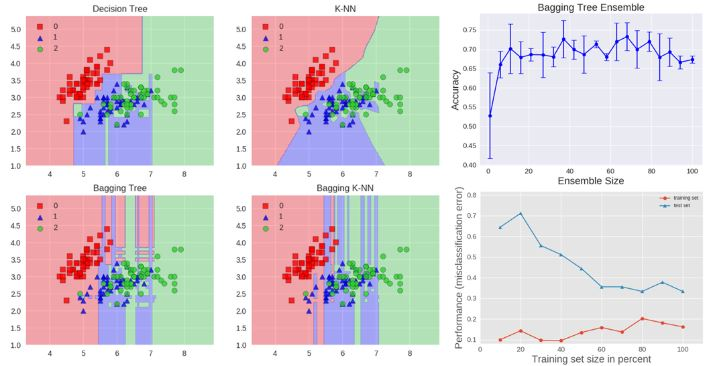

In [118]:
#from IPython.display import Image
#Image(filename='ensemble.JPG')

### *Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model.*

## Loading Data

In [119]:
from sklearn.datasets import load_wine
from sklearn import metrics

In [120]:
wine=load_wine()

In [121]:
x=wine.data

In [122]:
x.shape

(178, 13)

In [123]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [124]:
y=wine.target

In [125]:
y.shape

(178,)

In [126]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [127]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(x)

## Test Train Split

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Bagged Decision Trees

### Training

In [129]:
from sklearn.ensemble import BaggingClassifier
Classifier_bag=BaggingClassifier()
Classifier_bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

### Prediction

In [130]:
Y_pred_bag=Classifier_bag.predict(X_test)

### Accuracy

In [131]:
metrics.accuracy_score(Y_test,Y_pred_bag)

0.9722222222222222

## Random Forest Classification

### Training

In [133]:
from sklearn.ensemble import RandomForestClassifier
Classifier_rand=RandomForestClassifier()
Classifier_rand.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction

In [134]:
Y_pred_rand=Classifier_rand.predict(X_test)

### Accuracy

In [135]:
metrics.accuracy_score(Y_test,Y_pred_rand)

0.9722222222222222

## Stochastic Gradient Boosting Classification

### Training

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
Classifier_grad=GradientBoostingClassifier()
Classifier_grad.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Prediction

In [137]:
Y_pred_grad=Classifier_grad.predict(X_test)

### Accuracy

In [138]:
metrics.accuracy_score(Y_test,Y_pred_grad)

0.9444444444444444

## Voting Ensemble

### Training

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [140]:
Classifier_log=LogisticRegression()
Classifier_svc=SVC()
Classifier_dt=DecisionTreeClassifier()

In [141]:
Voting_en=VotingClassifier([('Log Reg',Classifier_log),('SVM',Classifier_svc),('Decision Tree',Classifier_dt)])
Voting_en.fit(X_train,Y_train)

VotingClassifier(estimators=[('Log Reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('SVM', SV...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Prediction

In [142]:
Y_pred_ve=Voting_en.predict(X_test)

### Accuracy

In [143]:
metrics.accuracy_score(Y_test,Y_pred_ve)

0.9722222222222222